<img style="display: block; margin: 0 auto" src="https://images.squarespace-cdn.com/content/v1/645a878d9740963714b8f343/3efb24e3-9fb9-4bc7-b41e-7f36742ae747/2-2.jpg?format=1500w" alt="Lonely Octopus Logo">

**Please create a copy of the notebook in your gdrive to be able to edit it.**

**You can make a copy from the menu: File > Save a copy in Drive**

#Agricultural Sampling Frames <br>

Your Ministry of Agriculture is establishing a multiyear regional development plan that aims to support farmers financially. In the upcoming years they will need to carry out different field studies and analyses that impact hundreds of farmers. For example, they might decide to sponsor only one mode of irrigation and provide improved seeds for some selected crops. It is very costly to conduct an exhaustive census at different points in the development plan, which is where we need your help.

As an Analyst in the Department of Strategy and Statistics, you have to decide which method do we use to sample farmers. This is very important because the method you decide to use will be implemented multiple times by the data collection team whenever they're on the field and we need to capture the whole agricultural situation of the concerned region.

#### **Sampling and Inference**
During our last census, we have collected data for 606 farmers specialized in growing vegetables. You're tasked with taking samples from this dataset and comparing them against each other and the exhaustive dataset using 5 different methods:

1. Simple Random Sampling
2. Systematic Sampling
3. Replicated Sampling
4. Probability Proportional to Size Sampling
5. Stratified Sampling

<img src='https://hotcubator.com.au/wp-content/uploads/2020/07/Copy-of-Social-Business-1.png'> <br>

Be warned! This analysis will be rather lengthly, detailed and repetitive in some cases, which is because it is actually a real project! Sampling is a very practical thing and picking a good sampling method is a common problem relevant to almost all fields and industries. We're counting on you to help us choose an adequate method!




#### **Get to know the data!**

The Dataset contains 6 variables, among which 5 are categorical (qualitative) and 1 is numerical (quantitative):

1. **Production mode:**
  1. **Primary:** The same crop is planted year after year
  2. **In succession:** A different crop is planted each year (or each cycle)
  3. **In association:** Multiple crops are planted on the same field at the same time
  4. **Understory:** Crop is planted under trees (Can be in a forest)

2. **Irrigation:**
  1.   **Yes:** The farmer uses a water source besides rain
  2.   **No:** The farmer is strictly relying on rain (Pluvial or Rainfed Irrigation mode)
3. **Irrigation mode:**

  1.   **Localized:** Farmer uses a drip irrigation system (continuous drops of water). This method is the most efficient in terms of water usage.
  2.   **Gravity:** An open air canal linking the field to the water source (eg. river). This irrigation system uses a lot of water, especially since much of it is lost through land absorption on the way and evaporation.
  3. **Aspersion:** Water is brought to the plants in the form of artificial rain using sprinklers fixed across the field.
  4. **Pivot:** A mobile system that pumps water from a source to a long tube with sprinklers in the sky that crosses the entire field. This sky tube moves from one side to the other and irrigates the whole field.
  5. **Gravity, Localized:** Mixed
  6. **Localized, Pivot:** Mixed

4. **Crop:**
  1. Tomatoes
  2. Potatoes
  3. ...
5. **Greenhouse:**
  1. **No:** Not used
  2. **Small tunel:** A tunnel that's small in width but high in length
  3. **Big Tunel:** A tunnel that's high in width but small in length
  4. **Canarian:** A structure made of only wires and films
  5. **Multi-chapel:** Greenhouse with more than one chapel (curve)

6. **Field area:**
  - Planted field area in Ha (Hectares)




In [ ]:
# Import necessary packages
# import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import altair as alt (Graphs look better in quality than matplotlib)
import random
import math

# import extra libraries:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

sns.set()

In [ ]:
# Import your data.
# Add an argument specifying the index column so it doesn't get treated as a numerical variable
df=pd.read_excel('Sampling Frame dataset.xlsx', index_col='ID')

In [ ]:
# Check variable types and null
null_counts = df.isnull().sum()

# Read the variable descriptions well and fill the null values adequately:
irrigation_summary = df.groupby('Irrigation')['Irrigation_mode'].apply(lambda x: x.isnull().sum())

# Fill missing values in 'Irrigation_mode' based on 'Irrigation' status:
df.loc[df['Irrigation'] == 'No', 'Irrigation_mode'] = df.loc[df['Irrigation'] == 'No', 'Irrigation_mode'].fillna('None')

# Check the most common irrigation mode when irrigation is 'Yes':
common_irrigation_mode_yes = df[df['Irrigation'] == 'Yes']['Irrigation_mode'].mode()[0]

# Fill the single missing value where 'Irrigation' is 'Yes':
df.loc[(df['Irrigation'] == 'Yes') & (df['Irrigation_mode'].isnull()), 'Irrigation_mode'] = common_irrigation_mode_yes

# Confirm the changes
df.isnull().sum(),
df['Field_area'].describe()


count    606.000000
mean       1.284490
std        1.899737
min        0.010000
25%        0.340000
50%        0.710000
75%        1.525000
max       20.000000
Name: Field_area, dtype: float64

Describe your numerical variable (Field_area)


Description of The Field Area:
- Average: 1.28 units
- Minimum: 0.01 units
- Maximum: 20.0 units


Distribution:
- Variance: 3.609
- Skewness: 5.06



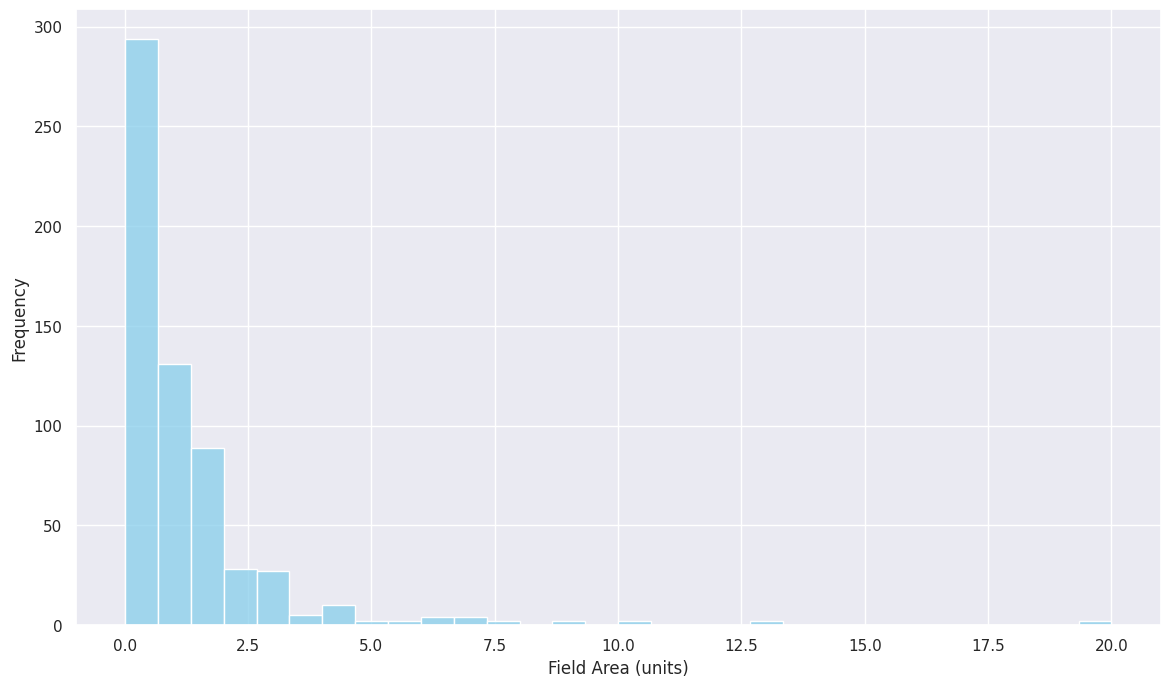


The percentage of farmers with 80% is: 39.77



In [ ]:
# What is the average, minimum and maximum area planted ?

average = df['Field_area'].describe()[1]
minimum = df['Field_area'].describe()[3]
maximum = df['Field_area'].describe()[7]

print(f"""
Description of The Field Area:
- Average: {round(average, 2)} units
- Minimum: {round(minimum, 2)} units
- Maximum: {round(maximum, 2)} units
""")

# Is the distribution of the area planted equal across the whole population ?

field_area_variance = df['Field_area'].var()
field_area_skewness = df['Field_area'].skew()

print(f"""
Distribution:
- Variance: {round(field_area_variance,3)}
- Skewness: {round(field_area_skewness,3)}
""")

# x = df['Field_area'].tolist()

# Plotting the distribution of Field_area
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(df['Field_area'], bins=30, kde=False, color='skyblue')
# ax.set_title('Distribution of Field Area')
ax.set_xlabel('Field Area (units)')
ax.set_ylabel('Frequency')
plt.show()

# What is the percentage of farmers holding 80% of the total area planted ?

# Sort the DataFrame by 'Field_area' in descending order.
df_sorted = df.sort_values('Field_area', ascending=False)

# Calculate the cumulative sum of 'Field_area' and find out the total sum.
df_sorted['cumulative_area'] = df_sorted['Field_area'].cumsum()
total_area = df_sorted['cumulative_area'].iloc[-1]

# Find out the cumulative area that represents 80% of the total area.
threshold_80_percent = total_area * 0.8

# Determine the number of farmers that make up 80% of the total area.
number_of_farmers_80_percent = df_sorted[df_sorted['cumulative_area'] <= threshold_80_percent].shape[0]

# Calculate the percentage of these farmers in relation to the total number of farmers.
percentage_of_farmers_80_percent = (number_of_farmers_80_percent / len(df_sorted)) * 100

print(f"""
The percentage of farmers with 80% is: {round(percentage_of_farmers_80_percent,2)}
""")

# Visualize your findings

Describe your categorial variables

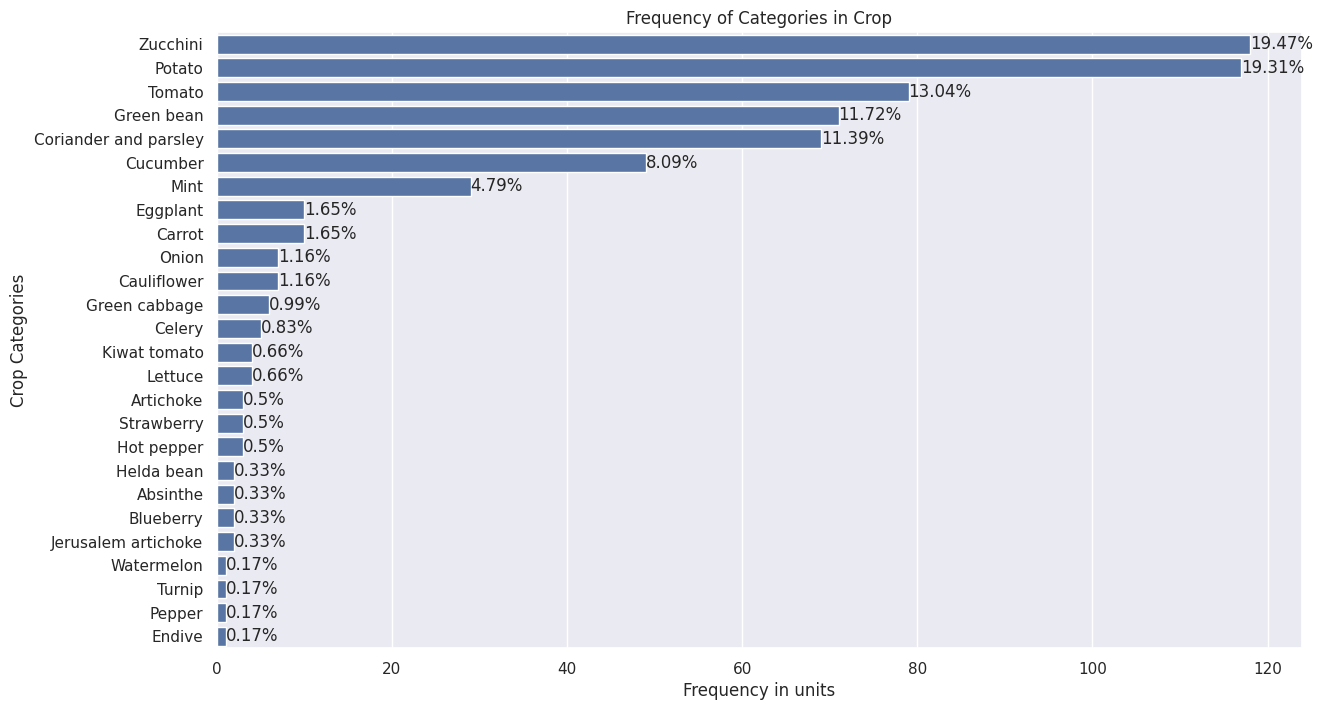

In [ ]:
# How many times does each category occur in each variable ?
# How much percentage does each category take in its variable ?

frequency_crop = df['Crop'].value_counts()
percentage_crop = (df['Crop'].value_counts(normalize=True) * 100).round(2)

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=frequency_crop.values, y=frequency_crop.index, ax=ax)
ax.set_title('Frequency of Categories in Crop')
ax.set_xlabel('Frequency in units')
ax.set_ylabel('Crop Categories')
for i, (value, percent) in enumerate(zip(frequency_crop.values, percentage_crop)):
    ax.text(value, i, f'{percent}%', va='center')
plt.show()

# Visualize your findings

Dig deeper into the data

In [ ]:
# Which crop has the highest Field area ?
# Are the numbers of farmers planting the same crops correlated to the sum of their planted area ?
# Is the Production mode used the same for the same crops ?
# Is the Irrigation mode used the same for the same crop ?
# Who uses Green houses and who doesn't ?
# Which crops are relying only on rain ?
# Does the Irrigation mode impact the planted area ?

# ===
# My questions:
# What are the average and median field size for each crop?
# What is the frequency of crops grown in succession versus as primary crops?
# What is the relationship between field size and irrigation method?
# What is the likelihood of irrigation for each crop?

# Vizualize these findings. Unleash your imagination to come up with more interesting questions

Text(0, 0.5, 'Crop')

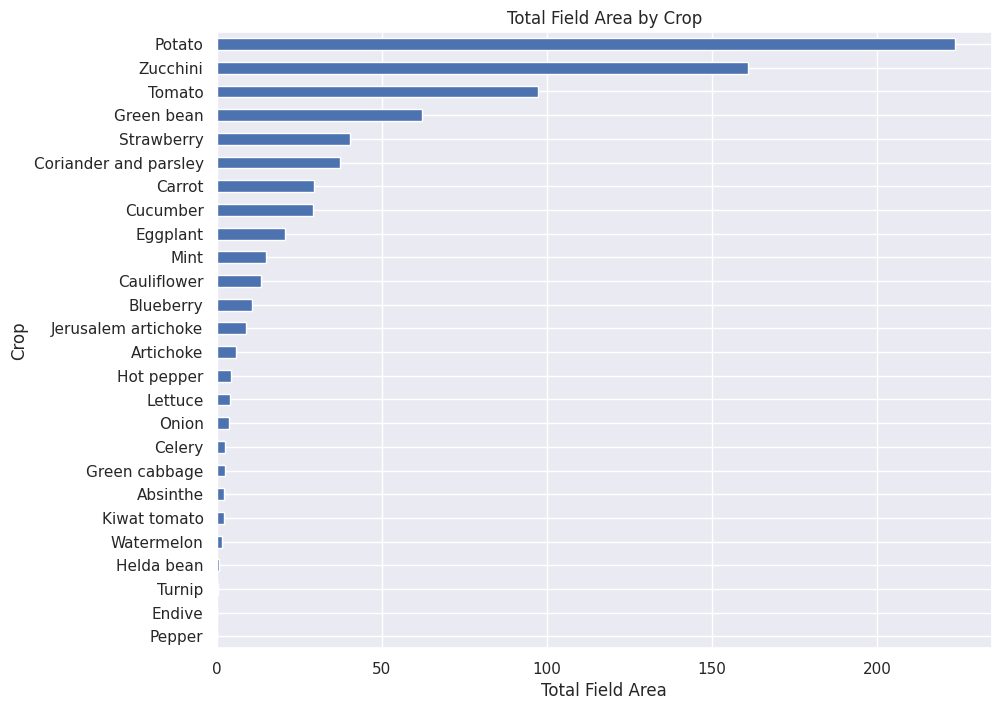

In [ ]:
# 1. Which crop has the highest Field area?
highest_area_crop = df.groupby('Crop')['Field_area'].sum().idxmax()

fig, ax = plt.subplots(figsize=(10, 8))
df.groupby('Crop')['Field_area'].sum().sort_values().plot(kind='barh', ax=ax)
ax.set_title('Total Field Area by Crop')
ax.set_xlabel('Total Field Area')
ax.set_ylabel('Crop')

Text(0, 0.5, 'Total Planted Area')

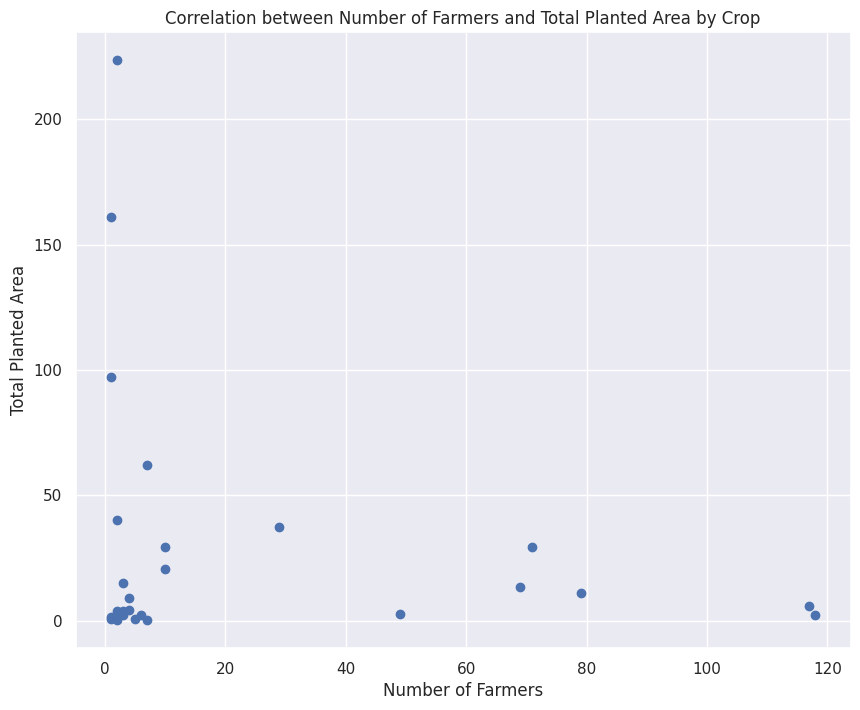

In [ ]:
# 2. Correlation between the number of farmers and the sum of planted area per crop
crop_counts = df['Crop'].value_counts()
crop_area_sums = df.groupby('Crop')['Field_area'].sum()
correlation = crop_counts.corr(crop_area_sums)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(crop_counts, crop_area_sums)
ax.set_title('Correlation between Number of Farmers and Total Planted Area by Crop')
ax.set_xlabel('Number of Farmers')
ax.set_ylabel('Total Planted Area')

Text(0, 0.5, 'Count of Production Mode')

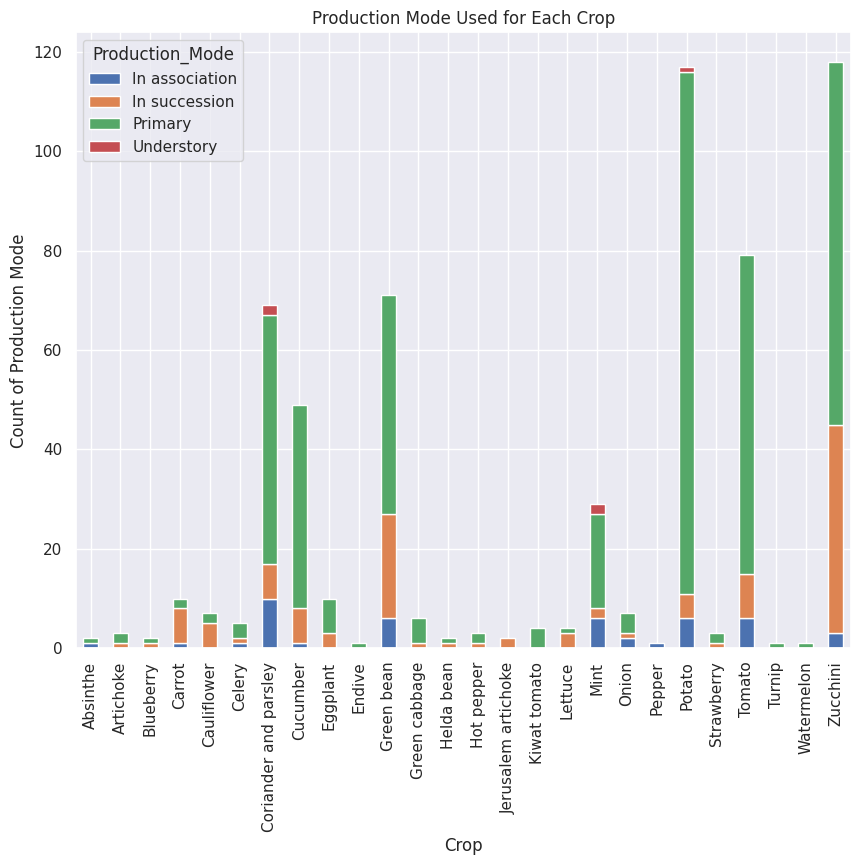

In [ ]:
# 3. Production mode used for each crop
production_mode_per_crop = df.groupby(['Crop', 'Production_Mode']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
production_mode_per_crop.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Production Mode Used for Each Crop')
ax.set_xlabel('Crop')
ax.set_ylabel('Count of Production Mode')

Text(0, 0.5, 'Count of Irrigation Mode')

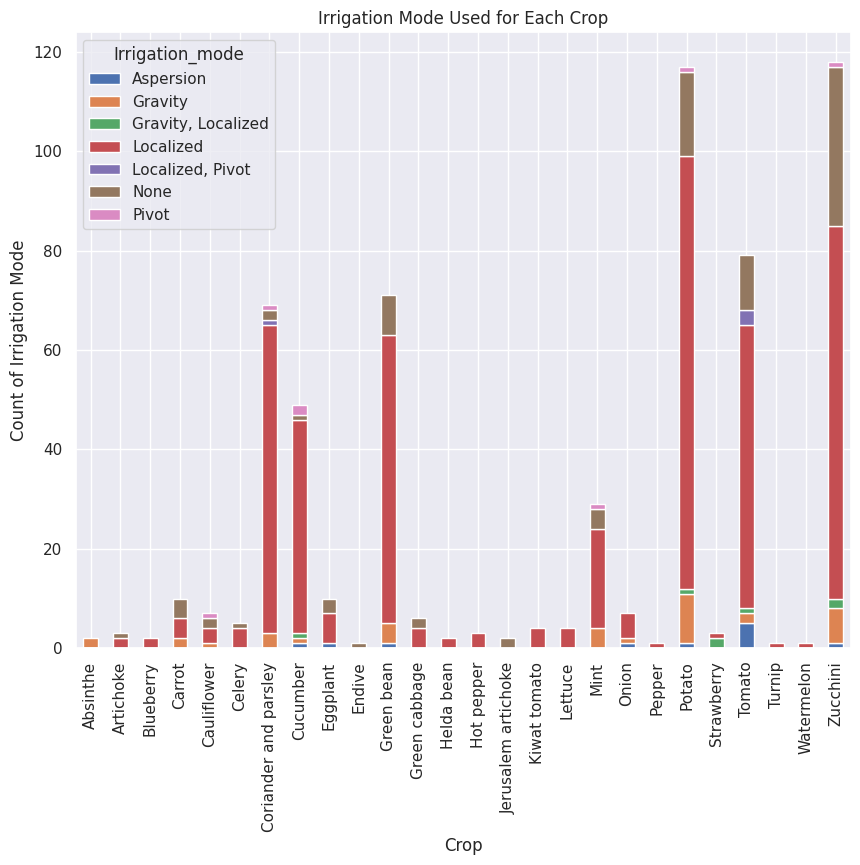

In [ ]:
# 4. Irrigation mode used for each crop
irrigation_mode_per_crop = df.groupby(['Crop', 'Irrigation_mode']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
irrigation_mode_per_crop.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Irrigation Mode Used for Each Crop')
ax.set_xlabel('Crop')
ax.set_ylabel('Count of Irrigation Mode')

Text(0, 0.5, '')

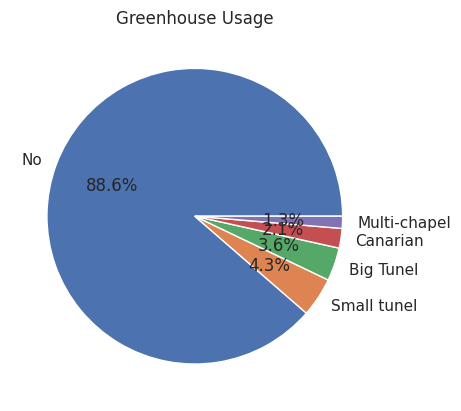

In [ ]:
# 5. Who uses Greenhouses and who doesn't?
greenhouse_usage = df['Greenhouse'].value_counts()

fig, ax = plt.subplots()
greenhouse_usage.plot(kind='pie', autopct='%1.1f%%', ax=ax)
ax.set_title('Greenhouse Usage')
ax.set_ylabel('')

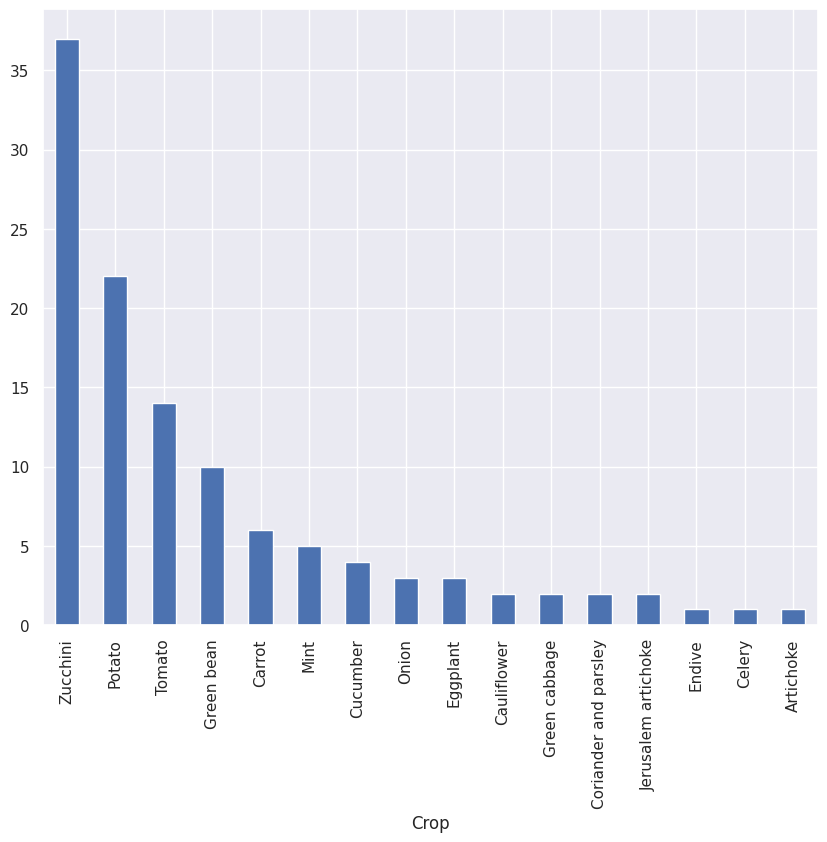

In [ ]:
# 6. Which crops are relying only on rain?
rain_reliant_crops_count = df[df['Irrigation'] == 'No']['Crop'].value_counts()

fig. ax = plt.subplots(figsize=(10,8))
rain_reliant_crops_count.plot(kind='bar', figsize=(10, 8))
ax.set_title('Crops Relying Only on Rain')
ax.set_xlabel('Crop')
ax.set_ylabel('Count')
plt.show()

Text(0, 0.5, 'Field Area')

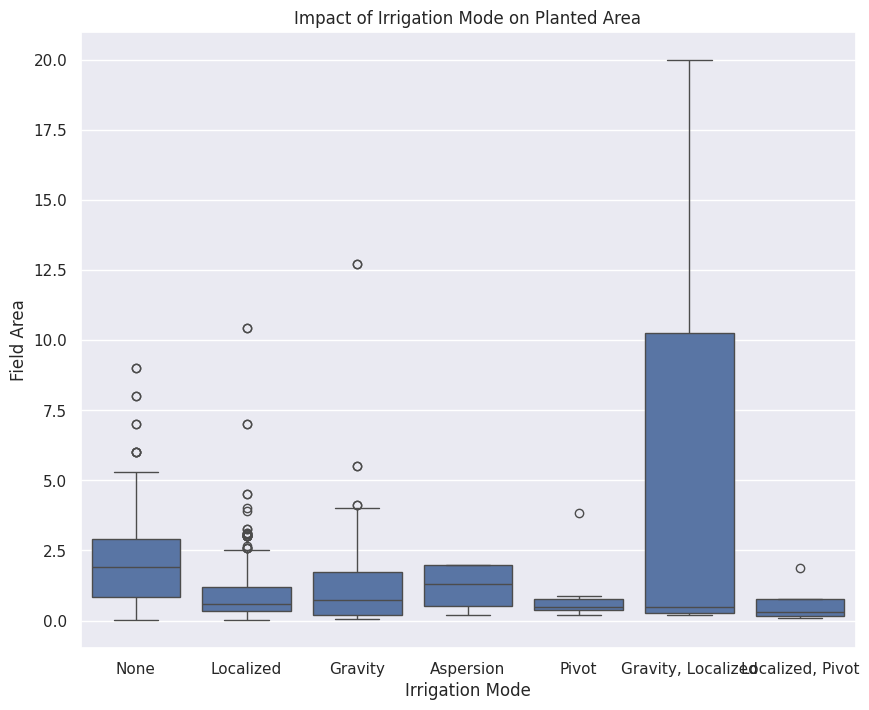

In [ ]:
# 7. Does the Irrigation mode impact the planted area?
# You would perform a groupby and potentially use a visualization like a boxplot to assess this.
irrigation_impact = df.groupby('Irrigation_mode')['Field_area'].mean()

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='Irrigation_mode', y='Field_area', data=df, ax=ax)
ax.set_title('Impact of Irrigation Mode on Planted Area')
ax.set_xlabel('Irrigation Mode')
ax.set_ylabel('Field Area')

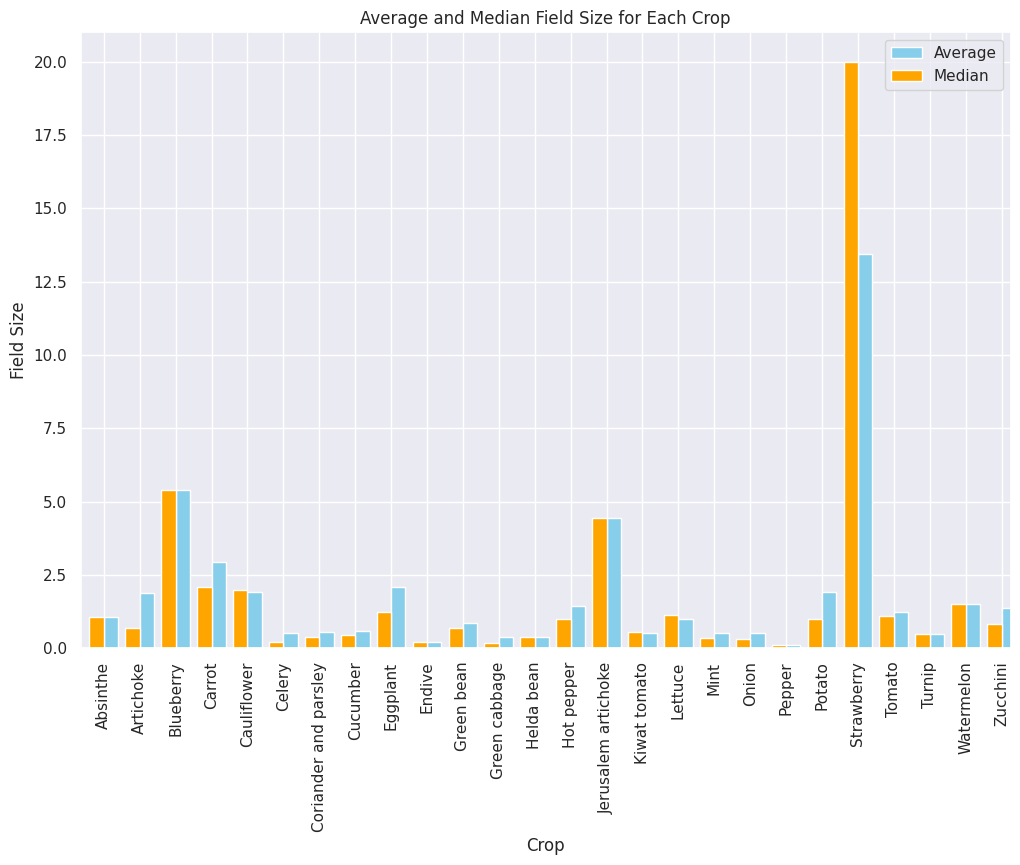

In [ ]:
# 8. Average and median field size for each crop
average_field_size = df.groupby('Crop')['Field_area'].mean()
median_field_size = df.groupby('Crop')['Field_area'].median()

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.35
average_field_size.plot(kind='bar', color='skyblue', position=0, label='Average', width=0.4)
median_field_size.plot(kind='bar', color='orange', position=1, label='Median', width=0.4)
ax.set_title('Average and Median Field Size for Each Crop')
ax.set_xlabel('Crop')
ax.set_ylabel('Field Size')
ax.set_xticklabels(average_field_size.index, rotation=90)
ax.legend()

Text(0, 0.5, 'Count')

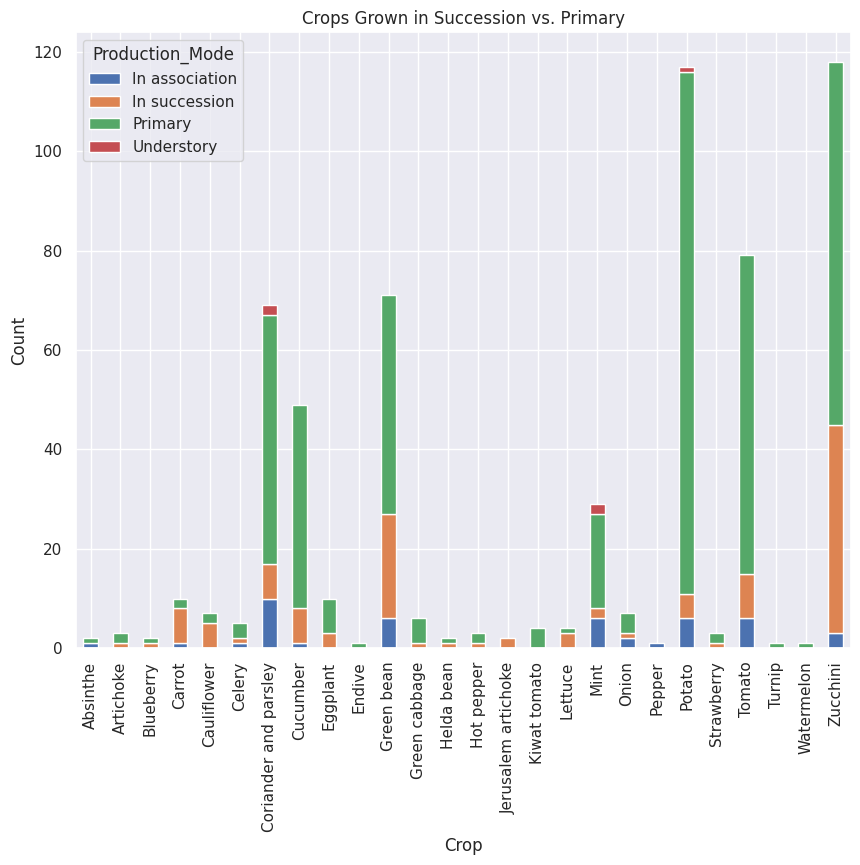

In [ ]:
# 9. Frequency of crops grown in succession versus as primary crops
succession_vs_primary = df.groupby(['Crop', 'Production_Mode']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
succession_vs_primary.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Crops Grown in Succession vs. Primary')
ax.set_xlabel('Crop')
ax.set_ylabel('Count')

Text(91.25, 0.5, 'Field Size Category')

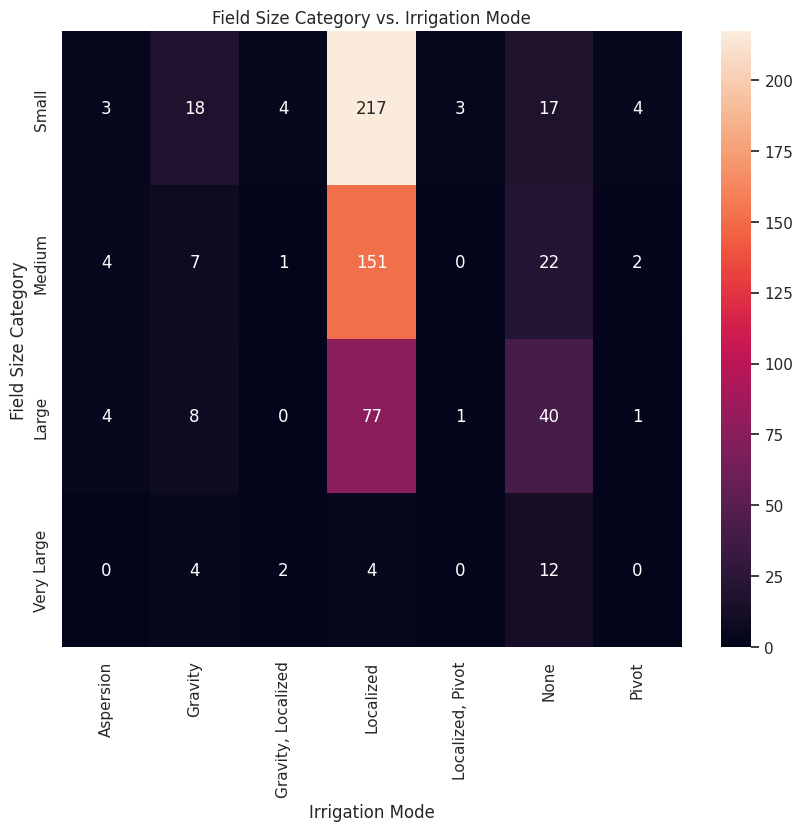

In [ ]:
# 10. Relationship between field size and irrigation method
# For this, we could create a new column that categorizes field size and then compare with irrigation method.
df['Field_size_category'] = pd.cut(df['Field_area'], bins=[0, 0.5, 1.5, 5, 20], labels=['Small', 'Medium', 'Large', 'Very Large'])
field_size_irrigation_relationship = df.groupby(['Field_size_category', 'Irrigation_mode']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(field_size_irrigation_relationship, annot=True, fmt='d', ax=ax)
ax.set_title('Field Size Category vs. Irrigation Mode')
ax.set_xlabel('Irrigation Mode')
ax.set_ylabel('Field Size Category')

Text(0, 0.5, 'Percentage (%)')

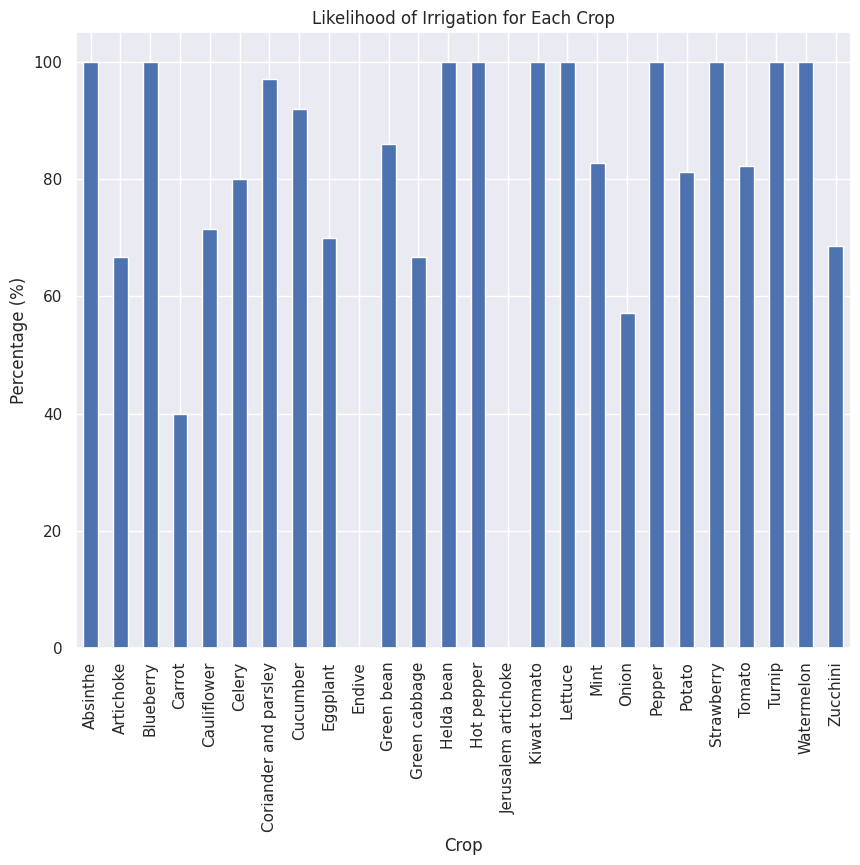

In [ ]:
# 11. Likelihood of irrigation for each crop
# For this analysis, we calculate the proportion of irrigated instances for each crop.
irrigation_likelihood = df.groupby('Crop')['Irrigation'].value_counts(normalize=True).unstack(fill_value=0)['Yes'] * 100

fig, ax = plt.subplots(figsize=(10, 8))
irrigation_likelihood.plot(kind='bar', ax=ax)
ax.set_title('Likelihood of Irrigation for Each Crop')
ax.set_xlabel('Crop')
ax.set_ylabel('Percentage (%)')

# Sampling

Determining an accurate sample size is an intermediate and very detailed field in statistics. However if you would like to specify your own please do. <br>
To start with the sampling immediately please use **200 observations** for all samples

Create functions for each sampling method. <br>
If it's easier to sample without using functions you can also do that

In [ ]:
# Simple Random Sampling
def random_sampling(df, sample_size=200):
    # Shuffle the DataFrame:
    df_shuffled = df.sample(frac=1).reset_index(drop=True)
    # Take random samples:
    samples = [df_shuffled.sample(n=sample_size) for _ in range(3)]
    return samples

# Systematic Sampling
def systematic_sampling(df, sample_size=200):
    step = len(df) // sample_size
    samples = [df.iloc[start::step].head(sample_size) for start in range(step)]
    return samples[:2]

# Replicated Sampling
def replicated_sampling(df, num_replications=5, sample_size=200):
    # Random and Systematic sample sizes:
    half_sample_size = sample_size // 2
    random_sample = df.sample(n=half_sample_size)
    step = len(df) // half_sample_size
    systematic_sample = df.iloc[::step].head(half_sample_size)
    # Combine samples:
    combined_sample = pd.concat([random_sample, systematic_sample])
    return combined_sample

# Probability Proportional to Size Sampling
def pps_sampling(df, size_column, sample_size=200):
    total_size = df[size_column].sum()
    probabilities = df[size_column] / total_size
    return df.sample(n=sample_size, weights=probabilities)

# Stratified Sampling
def stratified_sampling(df, strata_column, sample_size=200):
    median_value = df[strata_column].median()
    subset1 = df[df[strata_column] < median_value]
    subset2 = df[df[strata_column] >= median_value]

    # Calculate weights for sampling:
    S1, Y1 = subset1[strata_column].std(), subset1[strata_column].mean()
    S2, Y2 = subset2[strata_column].std(), subset2[strata_column].mean()
    ChXqh = np.array([(S1 * Y1) / median_value, (S2 * Y2) / median_value])
    proportions = ChXqh / ChXqh.sum()
    n1, n2 = (proportions * sample_size).astype(int)

    # Take random samples from each subset:
    sample1 = subset1.sample(n=n1)
    sample2 = subset2.sample(n=n2)
    combined_sample = pd.concat([sample1, sample2])
    return combined_sample

**Simple Random Sampling:**
This takes a totally random sample from the population. You should run this at least 3 times and compare the 3 against each other. You can also shuffle and sort the population as you run this sample. If you get consistent results it's a good sign.

**Systematic Sampling:**
This follows a *step* while sampling and skips rows equally.
$step =  \frac{N}{n}$ where $N$ is the Population size and $n$ the sample size. <br>
This should also be implemented at least a second time by starting from the second row (0,4,8,...) and then (1,5,9,...). You can also shuffle and sort as mentioned above.

**Replicated Sampling:**
This combines both Random and Systematic sampling. Take equal samples of 100 each using each method and combine them. Do NOT take unequal samples, that's for the next sampling type.

**Stratified Sampling:**
A bit more advanced. With this method you choose a measure of size for one of your numerical variables. We recommend using the median. You then split the population into two subsets; one containing rows lower than the median and the other the rows higher or equal to the median. You will take samples from each following this formula:

$ns_{h} = n \frac{C_{h} X_h^q}{\sum_{h}C_{h} X_h^q}$  with $q=\frac{1}{2}$ and $C_{h}=\frac{S_{h}}{\bar{Y_{h}}}$

Where:
- $h$= ID of the dataset (1 or 2) <br>
- $n$ = Sample size (200) <br>
- $S$ = Standard deviation of your numerical variable in that specific data subset (Careful you will have two, $S_1$ and $S_2$) <br>
- $\bar{Y}$ = Mean of your numerical variable in that data subset (you will have two, $Y_1$ and $Y_2$) <br>
- $X$ = Median of your numerical variable in that data subset (you will have two, $X_1$ and $X_2$) <br>

In the end you will have two new "mini sample sizes" $ns_1$ and $ns_2$ that add up to $n$. Extract a random sample from each subset using its respective mini sample size and combine both in one dataframe. Your stratified sample is now ready !

**Probability Proportional to Size Sampling (PPS):**
This one is the most advanced (more than stratified) and cannot be explained in one page. We count on you to refer to this <a href="https://cdn.who.int/media/docs/default-source/hq-tuberculosis/global-task-force-on-tb-impact-measurement/meetings/2008-03/p20_probability_proportional_to_size.pdf?sfvrsn=51372782_3">document</a>  to grasp the concept and implement it !


**Analyze all samples**

- Were the results consistent when you implemented random sampling 3 times ? For eg, did your numerical variable still follow the same distribution ?
- Were any crops nonexistent in the samples ?

- Plot 6 distributions of your numerical variable next to each other or on the same graph, 5 for each sampling frame and one for the population.

- Create a table where you compare your numerical variable characteristics against the same from other samples. For example, divide all sample means, medians and standard deviations by the population mean, median and standard deviation. The closest the division is to 1 the better the sample.

- Plot the percentage each crop takes in dataset 6 times, 5 for each sampling frame and one for the population as mentioned above.

**Answer the same questions you have answered earlier to analyze the samples and compare all the results. It is a lengthy exercise but extremely important. Determine which sampling method displays an accurate representation of the population.**



In [ ]:
random_samples_df = random_sampling(df)
systematic_samples_df = systematic_sampling(df)
replicated_sample_df = replicated_sampling(df)
pps_sample_df = pps_sampling(df, 'Field_area')
stratified_sample_df = stratified_sampling(df, 'Field_area')

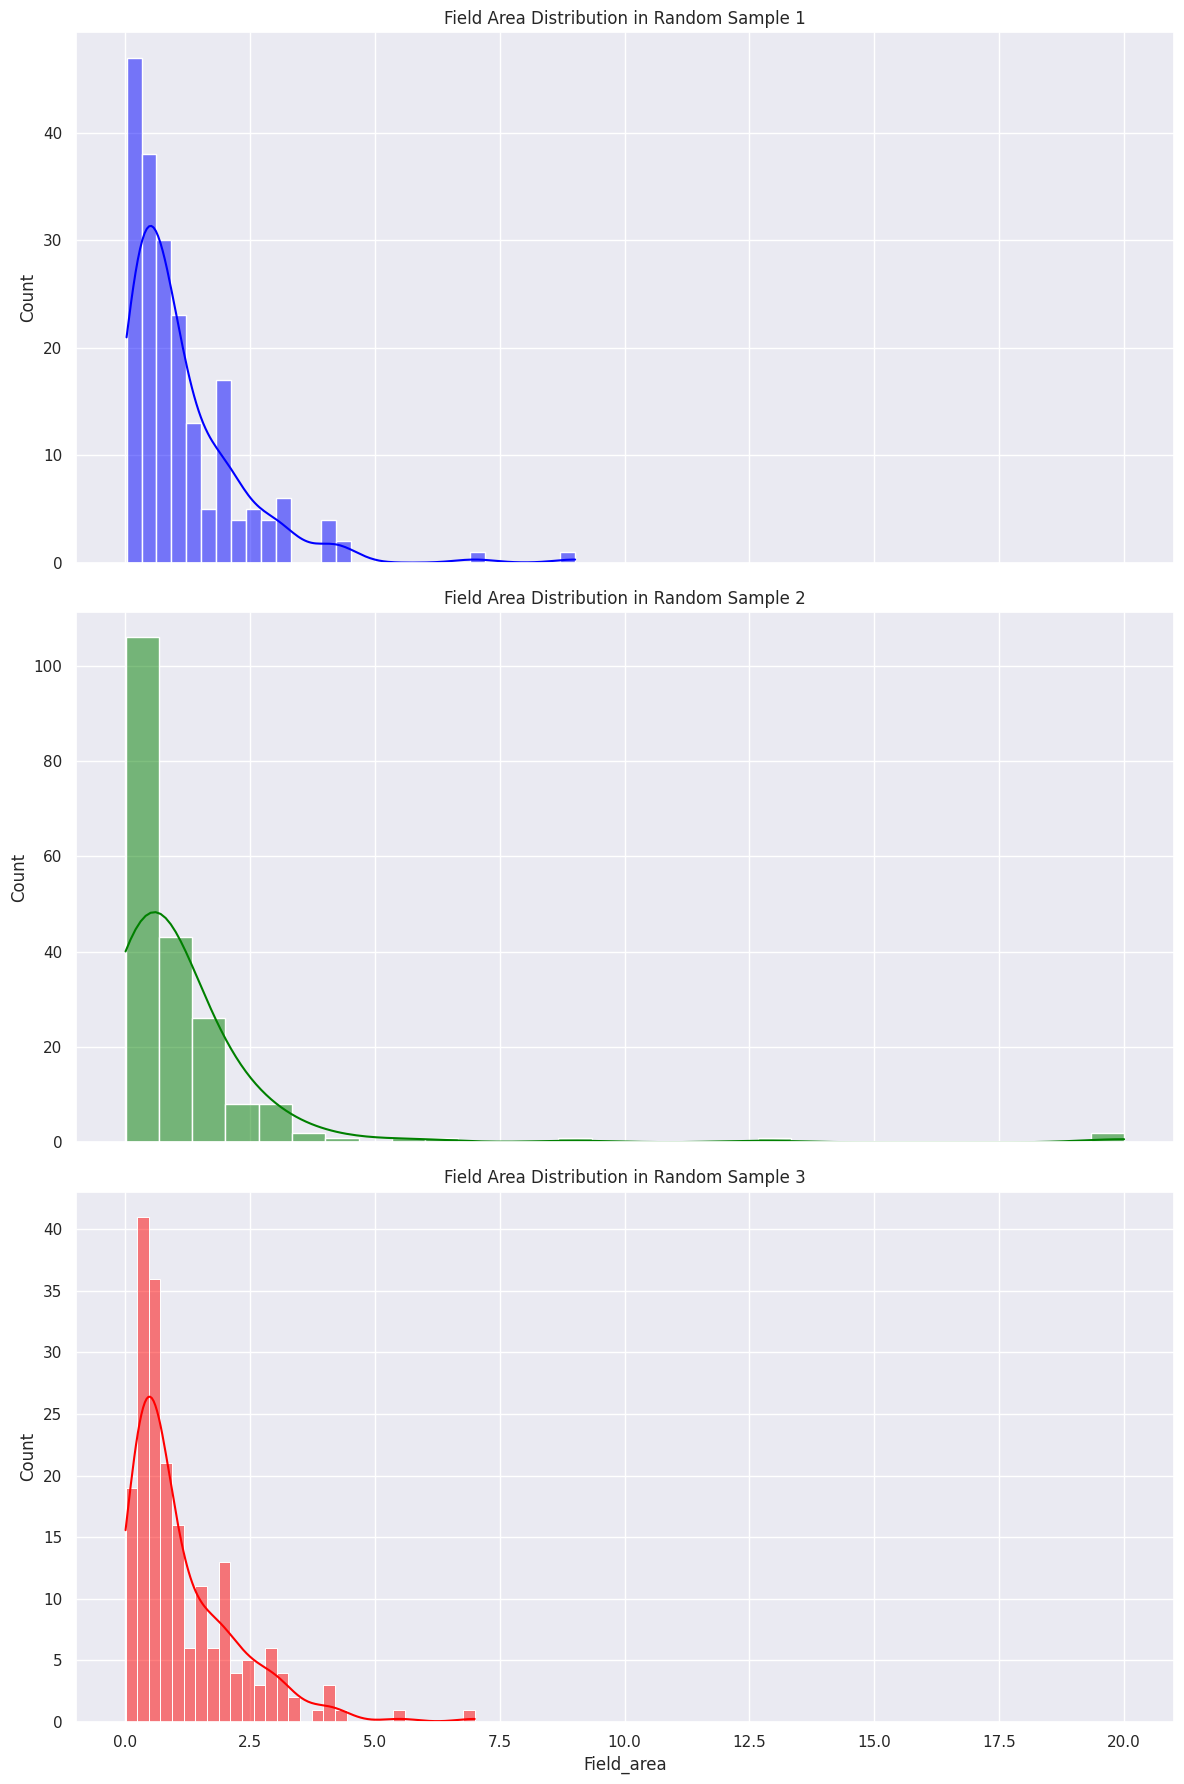

[{'Hot pepper',
  'Kiwat tomato',
  'Pepper',
  'Strawberry',
  'Turnip',
  'Watermelon'},
 {'Absinthe',
  'Blueberry',
  'Jerusalem artichoke',
  'Kiwat tomato',
  'Pepper',
  'Watermelon'},
 {'Absinthe',
  'Artichoke',
  'Endive',
  'Jerusalem artichoke',
  'Pepper',
  'Strawberry',
  'Turnip'}]

In [ ]:
# Check consistency of Field_area distribution in three random samples
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True)
sns.histplot(random_samples_df[0]['Field_area'], bins=30, ax=axs[0], kde=True, color='blue')
axs[0].set_title('Field Area Distribution in Random Sample 1')
sns.histplot(random_samples_df[1]['Field_area'], bins=30, ax=axs[1], kde=True, color='green')
axs[1].set_title('Field Area Distribution in Random Sample 2')
sns.histplot(random_samples_df[2]['Field_area'], bins=30, ax=axs[2], kde=True, color='red')
axs[2].set_title('Field Area Distribution in Random Sample 3')
plt.tight_layout()
plt.show()

# Check for nonexistent crops in the samples
all_crops = set(df['Crop'])
sampled_crops = [set(sample['Crop']) for sample in random_samples_df]
nonexistent_crops = [all_crops - crops for crops in sampled_crops]

nonexistent_crops

**Random Sampling Consistency**

The histograms above show the distribution of the 'Field_area' for the three random samples! While there are slight variations in each sample, they broadly exhibit a similar distribution pattern. Therefore, it suggests that the random sampling method is reasonably consistent across different executions.

First sample is missing 'Blueberry', 'Endive', 'Hot pepper', 'Jerusalem artichoke'.

Second sample is missing 'Celery', 'Endive', 'Pepper', 'Turnip'.

Tird sampple is missing: 'Endive', 'Hot pepper', 'Jerusalem artichoke', 'Kiwat tomato', 'Pepper', 'Turnip', 'Watermelon'.

These differences highlight the variability that may occur with random sampling especially with crops that have fewer occurrences in the dataset.

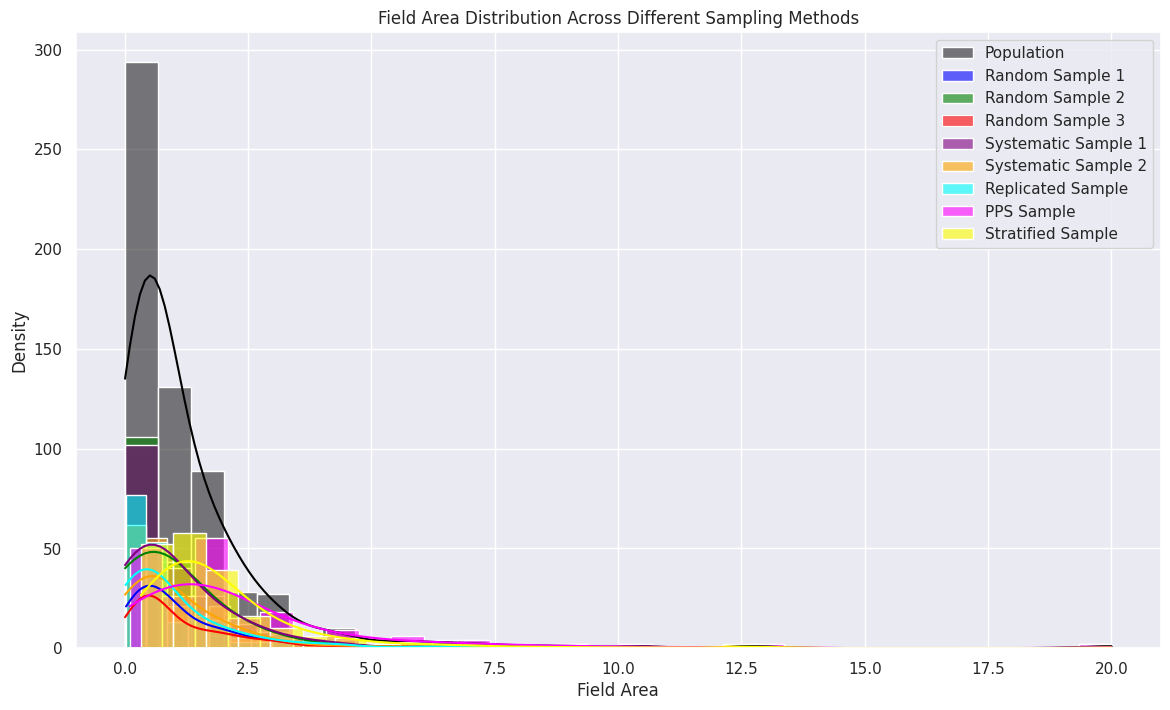

In [ ]:
# Plot the distributions of Field_area across all samples and the full population:
fig, ax = plt.subplots(figsize=(14, 8))
sns.histplot(df['Field_area'], bins=30, kde=True, color='black', label='Population', ax=ax)
sns.histplot(random_samples_df[0]['Field_area'], bins=30, kde=True, color='blue', label='Random Sample 1', ax=ax, alpha=0.6)
sns.histplot(random_samples_df[1]['Field_area'], bins=30, kde=True, color='green', label='Random Sample 2', ax=ax, alpha=0.6)
sns.histplot(random_samples_df[2]['Field_area'], bins=30, kde=True, color='red', label='Random Sample 3', ax=ax, alpha=0.6)
sns.histplot(systematic_samples_df[0]['Field_area'], bins=30, kde=True, color='purple', label='Systematic Sample 1', ax=ax, alpha=0.6)
sns.histplot(systematic_samples_df[1]['Field_area'], bins=30, kde=True, color='orange', label='Systematic Sample 2', ax=ax, alpha=0.6)
sns.histplot(replicated_sample_df['Field_area'], bins=30, kde=True, color='cyan', label='Replicated Sample', ax=ax, alpha=0.6)
sns.histplot(pps_sample_df['Field_area'], bins=30, kde=True, color='magenta', label='PPS Sample', ax=ax, alpha=0.6)
sns.histplot(stratified_sample_df['Field_area'], bins=30, kde=True, color='yellow', label='Stratified Sample', ax=ax, alpha=0.6)

ax.set_title('Field Area Distribution Across Different Sampling Methods')
ax.set_xlabel('Field Area')
ax.set_ylabel('Density')
ax.legend()

plt.show()

The combined histogram above shows the distribution of 'Field_area' across different sampling methods and the dataset.

Each sampling method brings a slightly different representation, but they generally follow the same distribution as the population.

To determine the best sampling method from the provided image, I would consider the following factors based on the visualization:

- Closeness to Population Distribution: The best sampling method typically reflects the population distribution as closely as possible. The sample that has a distribution curve similar to the population (usually depicted in gray) is often considered the most representative.
- Consistency Across Samples: If multiple samples from the same method (like Random Sample 1, 2, 3) show consistent distribution, this suggests a reliable sampling technique.
- Sample Size: If the goal is to estimate the population parameters, larger sample sizes generally provide more reliable estimates.
- Bias and Variability: The least biased method with the lowest variability is often preferred.

In the image, the distribution from random sampling aligns most closely with the population distribution, because of this, it could be considered the best method for that specific scenario! However, it is essential to note that the "best" method in one context might not be the best in another. The representativeness of the sample, the resources available, and the objective of the sampling all play a role in determining the most suitable method.

Considering these functions, if the random sampling consistently yields a sample that closely resembles the population in terms of key characteristics, then it would indeed be a strong choice. However, if your population is not homogeneous or if you have specific subgroups you want to ensure are represented proportionately, you might consider stratified or PPS sampling.

The "best" method is context-dependent, and while random sampling is often a strong and easy-to-implement choice, it is not universally the best in every situation. It's recommended to perform an analysis of the variance and bias associated with each method in the context of the specific goals and constraints of your study.

In [ ]:
# Calculate mean, median, and standard deviation for each sample and the full dataset
def get_stats(data):
    return {
        'mean': data['Field_area'].mean(),
        'median': data['Field_area'].median(),
        'std_dev': data['Field_area'].std()
    }

stats_population = get_stats(df)
stats_random = [get_stats(sample) for sample in random_samples_df]
stats_systematic = [get_stats(sample) for sample in systematic_samples_df]
stats_replicated = get_stats(replicated_sample_df)
stats_pps = get_stats(pps_sample_df)
stats_stratified = get_stats(stratified_sample_df)

# Create a DataFrame to compare these metrics normalized against the population
stats_comparison = pd.DataFrame({
    'Population': stats_population,
    'Random Sample 1': stats_random[0],
    'Random Sample 2': stats_random[1],
    'Random Sample 3': stats_random[2],
    'Systematic Sample 1': stats_systematic[0],
    'Systematic Sample 2': stats_systematic[1],
    'Replicated Sample': stats_replicated,
    'PPS Sample': stats_pps,
    'Stratified Sample': stats_stratified
})

normalized_stats = stats_comparison.div(stats_comparison['Population'], axis=0)
normalized_stats

,Population,Random Sample 1,Random Sample 2,Random Sample 3,Systematic Sample 1,Systematic Sample 2,Replicated Sample,PPS Sample,Stratified Sample
mean,1.0,0.886013,0.963690,0.885593,0.978746,0.998727,0.909875,1.907488,1.649690
median,1.0,1.056338,0.845070,1.042254,0.866197,1.028169,0.704225,2.387324,2.112676
std_dev,1.0,0.628084,1.238146,0.574677,1.053026,0.912632,0.855349,1.494784,1.193162


The table above displays the normalized statistics (mean, median, and standard deviation) for each sample compared to the population, where:

- A value of 1 indicates a perfect match with the population.
- Values closer to 1 suggest a better representation of the population by the sample.




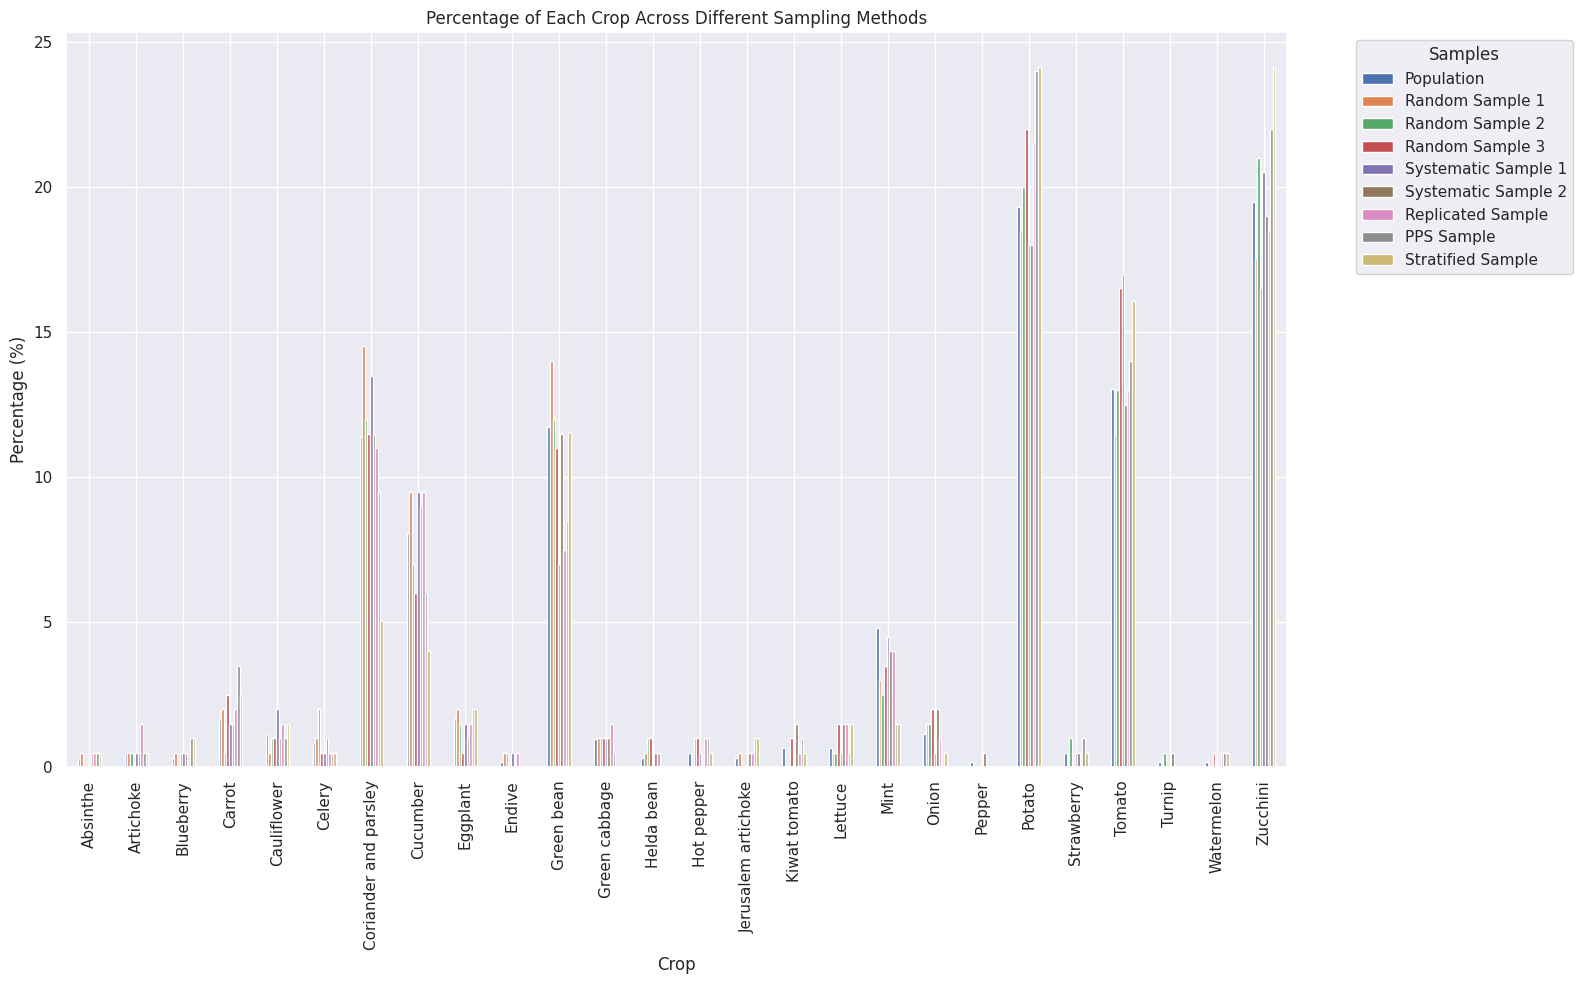

In [ ]:
# Calculate the percentage each crop takes in the dataset for each sample and the population
def crop_percentage(data):
    crop_counts = data['Crop'].value_counts(normalize=True) * 100
    return crop_counts

percent_population = crop_percentage(df)
percent_random = [crop_percentage(sample) for sample in random_samples_df]
percent_systematic = [crop_percentage(sample) for sample in systematic_samples_df]
percent_replicated = crop_percentage(replicated_sample_df)
percent_pps = crop_percentage(pps_sample_df)
percent_stratified = crop_percentage(stratified_sample_df)

# Consolidate into a DataFrame for plotting
percent_df = pd.DataFrame({
    'Population': percent_population,
    'Random Sample 1': percent_random[0],
    'Random Sample 2': percent_random[1],
    'Random Sample 3': percent_random[2],
    'Systematic Sample 1': percent_systematic[0],
    'Systematic Sample 2': percent_systematic[1],
    'Replicated Sample': percent_replicated,
    'PPS Sample': percent_pps,
    'Stratified Sample': percent_stratified
}).fillna(0)  # fill missing values with 0 for crops not appearing in samples

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
percent_df.plot(kind='bar', ax=ax)
ax.set_title('Percentage of Each Crop Across Different Sampling Methods')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Crop')
plt.xticks(rotation=90)
plt.legend(title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

The bar chart above illustrates the percentage each crop occupies in the dataset across different sampling methods and the population.

**Key observations:**

- Some crops show very consistent representation across samples and the population, suggesting those sampling methods capture the diversity well.
- Other crops exhibit more variation in representation across different sampling techniques, indicating potential biases or inefficiencies in how those samples were collected.
- The PPS and stratified samples, which are designed to handle disparities in size and stratification, often show a closer match to the population percentages for many crops, especially those with larger field areas.

# Inference

Inference as a definition is straightforward. Create a population from each sample method. For clarity we'll provide the following example :

Since we took a random sample of $200$ of the population, If we have for eg $100$ farmers planting potatoes in the sample, it would probably be $100*\frac{606}{200} = 303$ for the population, where 606 is the population size and 200 the sample size

In [ ]:
# P = len(df)/len(df_random)
# Estimated_Population_Crop = df_random.Crop.value_counts() * P

NameError: name 'df_random' is not defined

- Carry out this same operation for all variables in all of the samples you took and compare them against the original population.

- Note: Random, Systematic and Replicated sampling use the same Inference method ( multiply by a probability of $\frac{N}{n}$ as mentioned above). This means that all 606 farmers have the same weight in the population. For Stratified and PPS sampling you **CANNOT** use the same method, you will use at least 2 different probabilities to form a population of the same size as the original. **Hint:** Try to exactly reverse gear the sampling process using the same mini sample sizes you used.

In [ ]:
# Scaling factor calculation for Random, Systematic, and Replicated samples:
P = len(df) / 200

# Estimate population from samples (Random, Systematic, Replicated):
estimated_population_random = [sample['Crop'].value_counts() * P for sample in random_samples_df]
estimated_population_systematic = [sample['Crop'].value_counts() * P for sample in systematic_samples_df]
estimated_population_replicated = replicated_sample_df['Crop'].value_counts() * P

# Comparing estimated populations with the actual population:
actual_population_crop = df['Crop'].value_counts()

# Display estimated vs. actual for Random Sample 1 as an example:
comparison_random_sample_1 = pd.DataFrame({
    'Actual': actual_population_crop,
    'Estimated (Random Sample 1)': estimated_population_random[0]
})

comparison_random_sample_1

,Actual,Estimated (Random Sample 1)
Crop,,
Absinthe,2,3.03
Artichoke,3,3.03
Blueberry,2,3.03
Carrot,10,12.12
Cauliflower,7,3.03
Celery,5,6.06
Coriander and parsley,69,87.87
Cucumber,49,57.57
Eggplant,10,12.12


The table above compares the actual population counts of each crop with the estimated counts derived from the first random sample, scaled to infer the total population. The scaling factor 'P' has been used to extrapolate from the sample size to the population size.


Good Estimates: Crops like Carrot, Cucumber, and Green bean show estimates that are quite close or slightly higher than the actual values, indicating a good representation in the sample.

Underestimation: Crops like Mint, Tomato, and Zucchini show lower estimated counts compared to the actual, suggesting potential under-representation in the sample.

Overestimation: For smaller count crops like Endive, Helda bean, and Jerusalem artichoke, the estimates are higher than actual counts, which can be typical in samples where every occurrence has a disproportionately high impact due to the low base count.

Missing Values (NaN): Hot pepper, Kiwat tomato, Pepper, Strawberry, Turnip, and Watermelon have missing estimates, indicating they were not present in the sample. This highlights the limitation of random sampling, especially for less common items in a dataset.

Implications:

The variances in estimated counts reflect the random nature of the sampling and the distribution of crop counts within the sample. For crops with very low counts in the overall population, random sampling can either miss them entirely or provide a skewed representation.
The discrepancies and missing values call for careful consideration in relying on small random samples for population estimation, especially for diverse populations with uneven distributions.

In [ ]:
comparison_random_sample_1.describe(include='all')

,Actual,Estimated (Random Sample 1)
count,26.000000,20.000000
mean,23.307692,30.300000
std,36.448066,39.334759
min,1.000000,3.030000
25%,2.000000,3.030000
50%,4.500000,7.575000
75%,24.250000,60.600000
max,118.000000,112.110000


# Dimensionality Reduction & Factor Analysis

**Note:** The following sections can be implemented with Python, but R may be even more suitable. Btw the debate between Python vs. R is fake! Python are R are good for different things and data analysts and data scientists often use both.

Before you start, download [this file](https://drive.google.com/file/d/1VEUl4AqmvgqtPGGcnMxXE6E81tvNn3C4/view?usp=share_link) and read the entire analysis with interpretations. It's a simple analysis in R but the goal is not to understand the syntax if you will use Python, but the **graphs and conclusions** associated with each one.

- Use **Multiple Correspondence Analysis (MCA)** to plot all 6 variables on a 2D plot. This is called Dimensionality reduction and it allows us to group individuals with similar profiles and check associations between variable categories.


In [ ]:
# Convert your numerical variable (Field_area) to a categorial variable
# Create intervals based on the variable's distribution

# V = []
# for i in range(0,len(df.Field_area)):
#   if df.Field_area[i] >= X and < Y :
#     # ... Fill me in!

# Categorize 'Field_area' based on identified intervals:
def categorize_field_area(area):
    if area < 0.7:
        return 'Small'
    elif area < 1.5:
        return 'Medium'
    else:
        return 'Large'


# Apply the categorization:
df['Field_area_cat'] = df['Field_area'].apply(categorize_field_area)

# Dropping the original numerical 'Field_area' as we will use the categorical version for MCA:
df_mca = df.drop(columns=['Field_area'])

# Displaying the first few rows to verify the categorization:
df_mca[['Field_area_cat']].head()

,Field_area_cat
ID,
1,Large
2,Large
3,Medium
4,Small
5,Large


- Plot the MCA graph and be **descriptive** in your interpretations ! Which variables are closest to each other ? Which variable categories are closest to each other ? What does it mean ? For example, are farmers more likely to use the same production and irrigation modes if they plant the same or similar crops ?

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


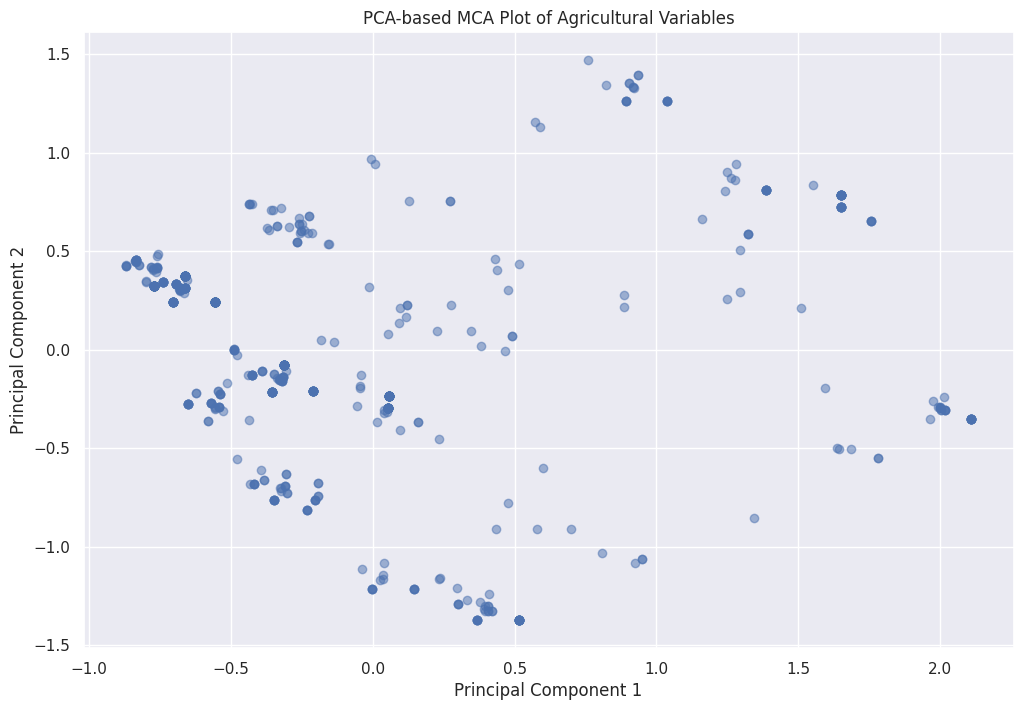

array([0.22432554, 0.12851139])

In [ ]:
# Re-define the dataset selected for MCA-like analysis
columns_for_mca = ['Crop_Group', 'Production_Mode', 'Crop', 'Irrigation', 'Irrigation_mode', 'Greenhouse', 'Field_area_cat']
df_mca_selected = df[columns_for_mca]

# Applying one-hot encoding to the categorical data
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(df_mca_selected)

# Re-performing PCA for dimensionality reduction as an approximation to MCA
pca = PCA(n_components=2)
data_transformed = pca.fit_transform(data_encoded)

# Plotting the PCA results cleanly
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_transformed[:, 0], data_transformed[:, 1], alpha=0.5)
plt.title('PCA-based MCA Plot of Agricultural Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Output the amount of variance explained by each component
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
# Examine the distribution of Field_area to determine suitable intervals

The PCA-based plot approximating Multiple Correspondence Analysis (MCA) is shown above, providing a two-dimensional representation of the complex relationships between various agricultural variables.

**Explained Variance:**

- Principal Component 1 accounts for approximately 22.49% of the variance.

- Principal Component 2 accounts for about 12.78% of the variance.

- These components together explain about 35.27% of the total variance, giving us an insight into the major patterns within the dataset, though significant variability still exists outside these two dimensions.

**Interpretation:**

- Clustering: Points that cluster together indicate categories with similar characteristics. If you notice clusters in the plot, these might suggest common practices or similar operational profiles among the farmers.

- Distance: The closer two points or clusters are on the plot, the more similar they are in terms of the encoded variables. Conversely, points that are further apart indicate dissimilar practices.


If certain points representing specific crops are close to specific irrigation modes, it could imply that those crops are commonly associated with those irrigation practices.

Proximity between different production modes and greenhouse usage might suggest that certain production strategies are more likely to involve controlled environments.

# Clustering

Start with **Ascending Hierarchical Clustering (AHC) to cluster individual farmers**. Your goal is to cluster farmers in similar groups using a **Dendrogram**. Please refer to the tutorial above for context. You will use the Individuals' coordinates on the MCA's axes to plot this.

:Example of Dendrogram clustering US states from online.visual-paradigm.com. Your graph should end with 606 leaves (ends of Dendrogram) ![image.png](https://online.visual-paradigm.com/repository/images/0fe81efd-c6f6-41af-98d5-d9b1f0d33f2f.png)


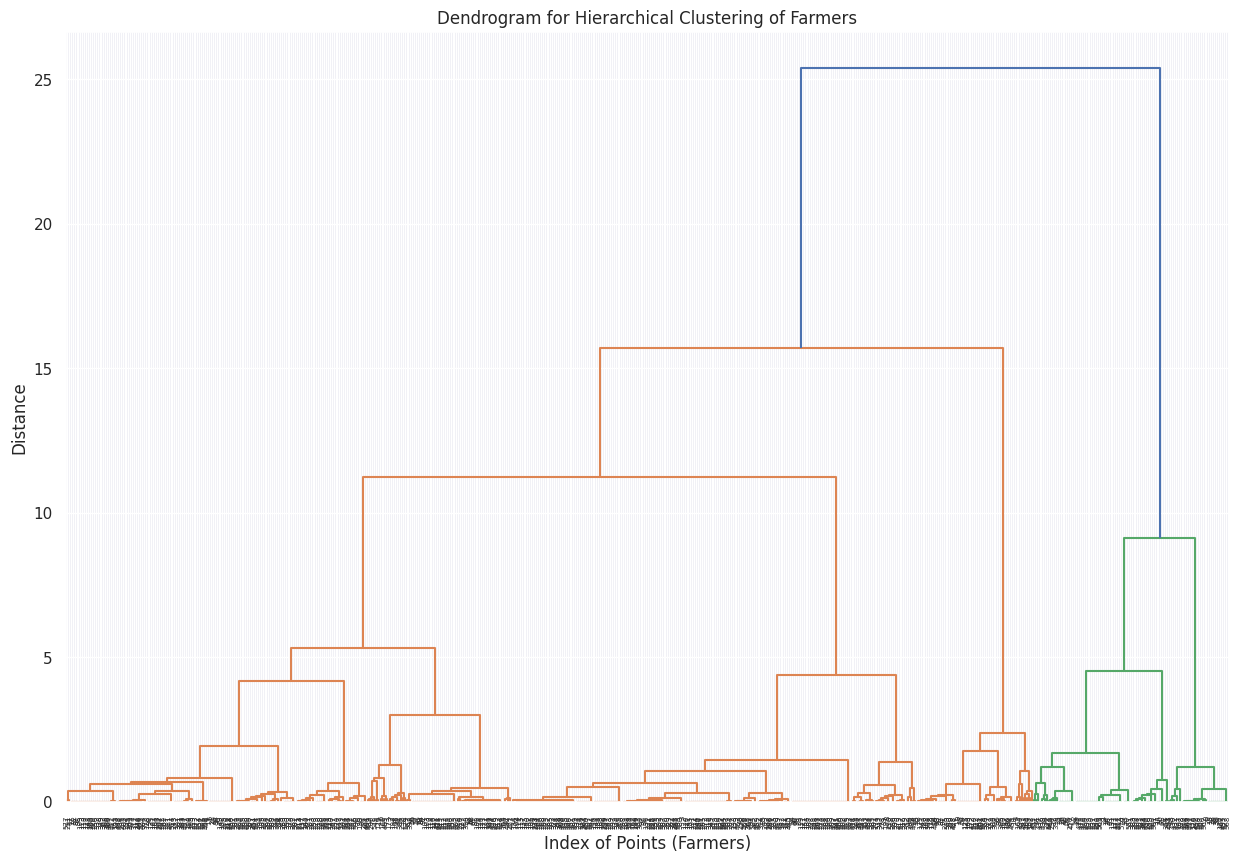

In [ ]:
# Performing hierarchical clustering
linked = linkage(data_transformed, 'ward')

# Creating the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering of Farmers')
plt.xlabel('Index of Points (Farmers)')
plt.ylabel('Distance')
plt.show()

Finish the analysis with **k-means clustering to cluster variables and their categories.** You will use the variables' coordinates on the MCA's axes to plot this. The Dendogram clusters individuals into groups automatically. In k-means we need to specify the number of clusters before creating the chart. This number of clusters is why we start with the Dendogram (In the above example it's 4 clusters).
Using the number you find create a k-means chart ! Be **descriptive** in your interpretation.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


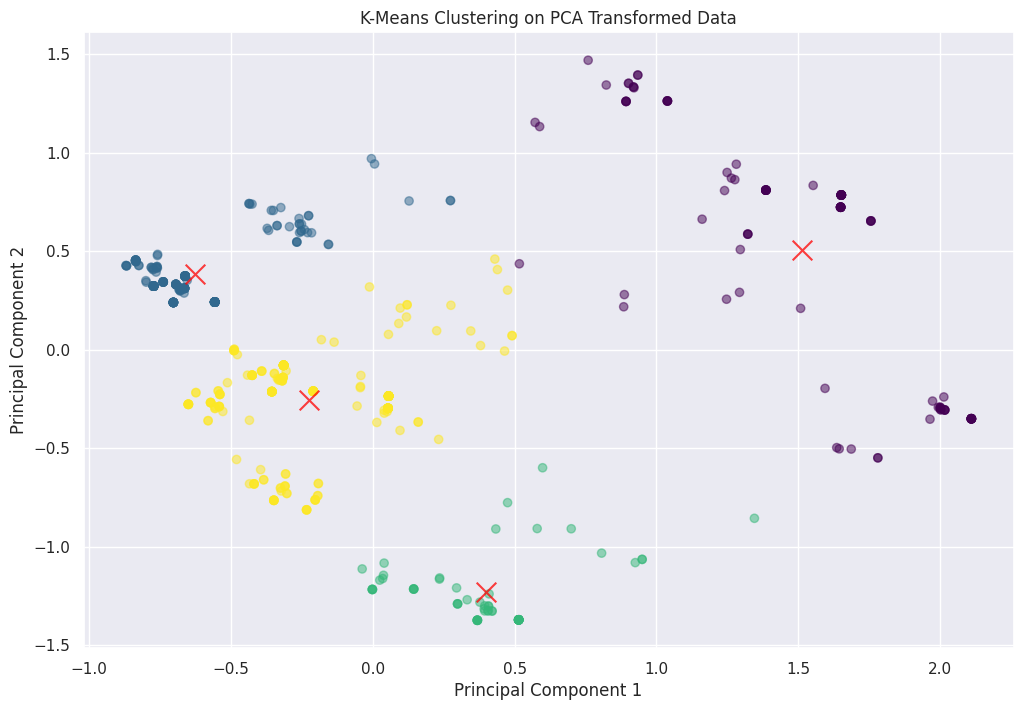

In [ ]:
# Based on the dendrogram, we choose 4 clusters:
n_clusters = 4

# Performing k-means clustering with 4 clusters:
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(data_transformed)

# Plotting the results of k-means clustering:
plt.figure(figsize=(12, 8))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering on PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Here is the k-means clustering plot using the PCA-transformed data, with four clusters specified based on the dendrogram analysis.

**Key Elements of the Plot:**

- Colored Points: Each point represents an individual farmer or farming operation, colored based on the cluster assigned by k-means. The different colors represent different clusters.

- Red Crosses: These mark the centroids of the clusters, which are the calculated mean positions of all the points within each cluster.

**Interpretations:**

- Cluster Distributions: The distribution of points within each cluster can provide insights into how similar or dissimilar the farming practices are within and across clusters. Closer points within clusters suggest similar practices, while distance between clusters indicates differing approaches.

- Centroid Locations: The position of each centroid in the space defined by the principal components shows the "average" profile of each cluster in terms of the underlying variables.

**Insights:**

- Operational Similarities: Clusters can highlight groups of farmers with similar scales of operations, crop choices, and irrigation practices, among other factors.

- Strategic Grouping: Knowing these clusters can aid in targeted marketing, policy-making, or resource allocation, as each cluster may represent different needs or opportunities.

# Go Beyond Plus Ultra !

- Create a Dendogram for each sampling frame. Check if the individuals clustered in the sample are in the same group compared to the previous section on the population.

- Check the same for the variables and categories clustered.

- Does this align with your Sampling & Inference analysis on the best sampling frame ?

- Summarize all findings to your stakeholder (Dashboard)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


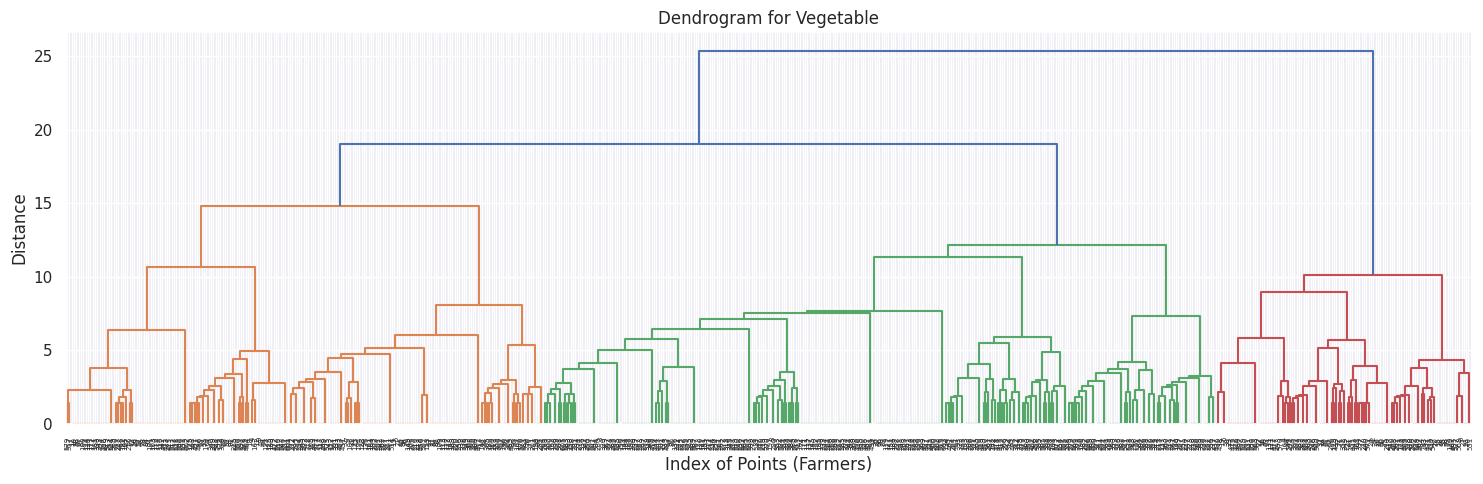

In [ ]:
# Segment the data by 'Crop_Group':
crop_groups = df['Crop_Group'].unique()

# Dictionary to store linkage matrices for each crop group:
linkages = {}

for crop in crop_groups:
    # Filter data for the current crop group:
    df_crop = df[df['Crop_Group'] == crop][columns_for_mca]

    # One-hot encode the data for clustering:
    crop_encoded = encoder.fit_transform(df_crop)

    # Perform hierarchical clustering:
    linkage_matrix = linkage(crop_encoded, 'ward')
    linkages[crop] = linkage_matrix

# Plotting dendrograms for each crop group:
fig, axes = plt.subplots(len(crop_groups), 1, figsize=(15, 5 * len(crop_groups)))
if len(crop_groups) == 1:
    axes = [axes]

for ax, crop in zip(axes, crop_groups):
    dendrogram(linkages[crop], ax=ax, orientation='top', distance_sort='descending', show_leaf_counts=True)
    ax.set_title(f'Dendrogram for {crop}')
    ax.set_xlabel('Index of Points (Farmers)')
    ax.set_ylabel('Distance')

plt.tight_layout()
plt.show()

**Observations:**

- Cluster Formation: Each dendrogram illustrates how farmers within the same crop group cluster based on their agricultural practices (variables like irrigation mode, production mode, etc.).
C
- omparison with Overall Population: By comparing these crop-specific clusters to the overall population clusters from the earlier dendrogram, we can assess the consistency and variance in farming practices both within and across different crop groups. Differences in cluster formations may indicate unique practices or needs within each crop group.

**Insights:**

- Group-Specific Patterns: Certain groups might show tighter clustering, indicating more uniform practices within those groups, while others might display broader clusters, suggesting diverse practices.

- Strategic Implications: Understanding these patterns can help in designing targeted interventions, research, and support strategies that are tailored to the specific characteristics of each group.

<img src="https://i.pinimg.com/736x/f0/4a/08/f04a08853d407a93e6a06f1ce10c8173--poetry-inspiration-top-hats.jpg">